## Atividade 05 - PIC

### Tema: Modelagem de sistema de refrigeração com dois estágios

---

#### Aluno: Abner Vieira Pereira

In [11]:
import CoolProp.CoolProp as CP
from numpy import *
import numpy as np
from IPython.display import Math

Consideramos um sistema de refrigeração em duas cascatas operando entre os limites de pressão de 0,8 MPa e 0,14 MPa. Cada etapa opera em um ciclo de refrigeração por variação de vapor ideal, utilizando o refrigerante R-134a como fluido de trabalho. A eliminação de calor do ciclo inferior para o ciclo superior ocorre em uma troca de calor contrafluxo adiabático, onde ambos os fluxos são com aproximadamente 0,32 MPa. Se um vazão mássica do refrigerante no ciclo superior para 0,05 kg/s, determine:

(a) a vazão mássica do refrigerante no ciclo inferior,

(b) a taxa de remoção de calor do espaço refrigerado e a potência consumida pelo compressor, e

(c) o coeficiente de desempenho (COP) deste refrigerador em cascata.

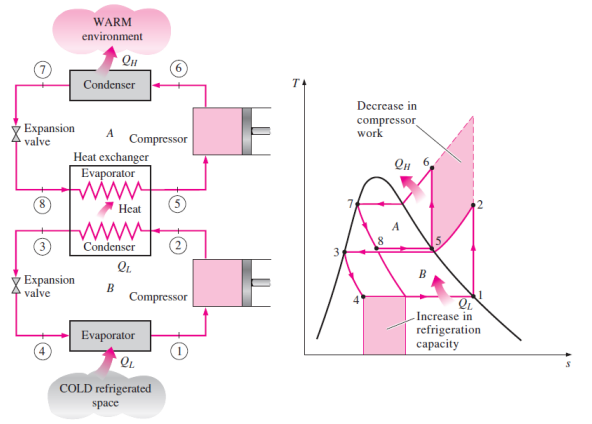

In [41]:
# Declarando variáveis
p_low = 0.14e6
p_high = 0.8e6
p_int = 0.32e6
m_ponto_super = 0.05
fluido = 'R134a'

## Estágio Superior

### Estado 1: Saída do evaporador

In [34]:
h1 = CP.PropsSI('H','P',p_low,'Q',1,fluido)
h1_c = h1/1000
display(Math(r'h_1 = %.3f \, kJ/kg' %h1_c))

<IPython.core.display.Math object>

In [35]:
s1 = CP.PropsSI('S','P',p_low,'Q',1,fluido)
s1_c = s1/1000
display(Math(r's_1 = %.3f \, kJ/kg°C' %s1_c))

<IPython.core.display.Math object>

### Estado 2: Entrada do condensador

In [36]:
h2 = CP.PropsSI('H','P',p_int,'S',s1,fluido)
h2_c = h2 / 1000
display(Math(r'h_2 = %.3f \, kJ/kg' %h2_c))

<IPython.core.display.Math object>

### Estado 3: Saída do condensador

In [45]:
h3 = CP.PropsSI('H','P',p_int,'Q',0,fluido)
h3_c = h3 / 1000
display(Math(r'h_3 = %.3f \, kJ/kg' %h3_c))

<IPython.core.display.Math object>

In [46]:
s3 = CP.PropsSI('S','P',p_int,'Q',0,fluido)
s3_c = s3 / 1000
display(Math(r's_3 = %.3f \, kJ/kg' %s3_c))

<IPython.core.display.Math object>

### Estado 4: Entrada do evaporador

In [49]:
h4_c = h3_c

In [48]:
s4 = CP.PropsSI('S','P',p_low,'S',s3,fluido)
s4_c = s4 / 1000
display(Math(r's_4 = %.3f \, kJ/kg°C' %s4_c))

<IPython.core.display.Math object>

## Estágio Superior

### Estado 5: Entrada do compressor

In [50]:
h5 = CP.PropsSI('H','P',p_int,'Q',1,fluido)
h5_c = h5 / 1000
display(Math(r'h_5 = %.3f \, kJ/kg' %h5_c))

<IPython.core.display.Math object>

In [51]:
s5 = CP.PropsSI('S','P',p_int,'Q',1,fluido)
s5_c = s5 / 1000
display(Math(r's_5 = %.3f \, kJ/kg°C' %s5_c))

<IPython.core.display.Math object>

### Estado 6 - saída do compressor

In [53]:
h6 = CP.PropsSI('H','P',p_high,'S',s5,fluido)
h6_c = h6 / 1000
display(Math(r'h_6 = %.3f \, kJ/kg' %h6_c))

<IPython.core.display.Math object>

### Estado 7 -  Saída do condensador

In [56]:
h7 = CP.PropsSI('H','P',p_high,'Q',0,fluido)
h7_c = h7 / 1000
display(Math(r'h_7 = %.3f \, kJ/kg' %h7_c))

<IPython.core.display.Math object>

### Estado 8 - Entrada do evaporador

In [57]:
h8 = CP.PropsSI('H','P',p_int,'H',h7,fluido)
h8_c = h8 / 1000
display(Math(r'h_8 = %.3f \, kJ/kg' %h8_c))

<IPython.core.display.Math object>

### Letra (a)

In [76]:
m_ponto_inf = (m_ponto_super * (h5_c - h8_c)) / (h2_c - h3_c)
display(Math(r' \dot{m}_{inf} = %.3f \, kg/s' %m_ponto_inf))

<IPython.core.display.Math object>

### Letra (b)

In [74]:
Q_l = m_ponto_inf * (h1_c - h4_c)
display(Math(r' Q_l = %.3f \, kJ' %Q_l))

<IPython.core.display.Math object>

In [71]:
w_comp_inf = m_ponto_inf * (h2_c - h1_c)
display(Math(r' \dot{W}_{com}^{inf} = %.3f \, kW' %w_comp_inf))

<IPython.core.display.Math object>

In [72]:
w_comp_sup = m_ponto_super * (h6_c - h5_c)
display(Math(r' \dot{W}_{com}^{sup} = %.3f \, kW' %w_comp_sup))

<IPython.core.display.Math object>

In [73]:
w_comp_tot = w_comp_inf + w_comp_sup
display(Math(r' \dot{W}_{tot} = %.3f \, kW' %w_comp_tot))

<IPython.core.display.Math object>

### Letra (c)

In [64]:
COP = Q_l / w_comp_tot
display(Math(r'COP = %.3f \, '%COP))

<IPython.core.display.Math object>